# Porcaccio Data Visualisations

#### Data Collection And Cleaning

---------


In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt

##### Fix old date format

In [2]:
#pd.to_datetime('2018-10-26 12:00:00.0000000011', format='%Y-%m-%d %H:%M:%S.%f')

In [3]:
def clean_date(date_string):
    return f"{date_string[6:10]}-{date_string[3:5]}-{date_string[0:2]} {date_string[11:19]}"

In [4]:
clean_data = pd.DataFrame()

In [5]:
# Clean all files in archived_sensor_data
dfs = []
for file in os.listdir(f"{os.getcwd()}/archived_sensor_data/csv/"):
    if file.endswith(".csv"):
        buffer_df = pd.read_csv(f"{os.getcwd()}/archived_sensor_data/csv/{file}")
        #print(buffer_df.head())
        buffer_df.columns = ['time', 'co2(ppm)', 'temperature(°C)', 'rel_humidity(percent)']
        #print(buffer_df.head())
        buffer_df["time"] = buffer_df["time"].apply(clean_date).apply(pd.to_datetime)
        buffer_df.set_index("time", inplace=True)
        #print(buffer_df.head())
        dfs.append(buffer_df)

print(dfs)

[                     co2(ppm)  temperature(°C)  rel_humidity(percent)
time                                                                 
2023-09-02 10:28:14       734            24.03                  57.66
2023-09-02 10:28:19       730            23.61                  58.72
2023-09-02 10:28:24       739            23.34                  59.61
2023-09-02 10:28:29       728            23.10                  60.38
2023-09-02 10:28:34       734            22.88                  61.15
...                       ...              ...                    ...
2023-09-03 13:56:38      1026            19.82                  75.02
2023-09-03 13:56:43      1011            19.87                  75.00
2023-09-03 13:56:48       972            19.91                  74.91
2023-09-03 13:56:53       958            19.99                  74.89
2023-09-03 13:56:58       947            20.01                  74.80

[19763 rows x 3 columns],                      co2(ppm)  temperature(°C)  rel_humidity(p

In [6]:
clean_df = pd.concat(dfs)

In [7]:
clean_df.sort_index(ascending=True, inplace=True)

In [8]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 66325 entries, 2023-08-30 17:39:34 to 2023-09-03 13:56:58
Data columns (total 3 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   co2(ppm)               66325 non-null  int64  
 1   temperature(°C)        66325 non-null  float64
 2   rel_humidity(percent)  66325 non-null  float64
dtypes: float64(2), int64(1)
memory usage: 2.0 MB


In [9]:
clean_df.to_csv("data/collected_data.csv")

#### Visualisations

---------

In [10]:
clean_df.columns

Index(['co2(ppm)', 'temperature(°C)', 'rel_humidity(percent)'], dtype='object')

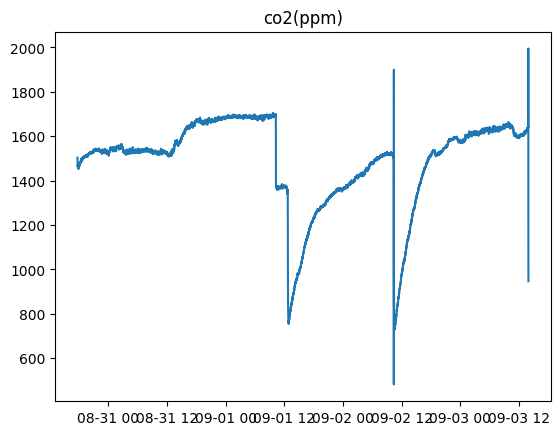

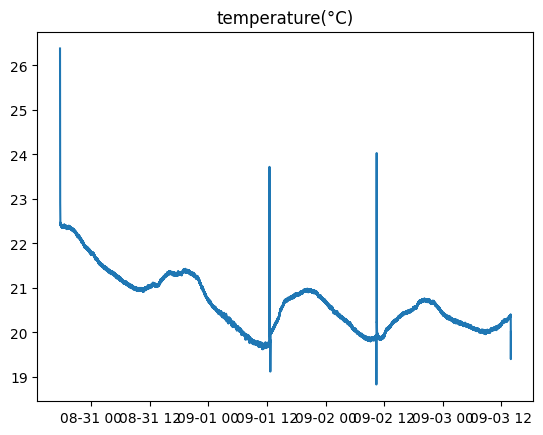

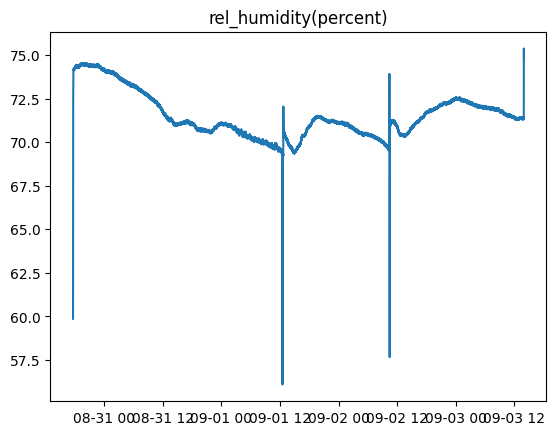

In [16]:
for column in clean_df.columns:
    plt.plot(clean_df[column])
    plt.title(column)
    plt.savefig(f"images/visualisations/{column}.png", format="png")
    plt.show()